# Telecom Customer Churn Analysis & Prediction

## Objectives:
1. To carry out EDA on the dataset to find insight on the customer churn
2. To build a model that will predict customer churn with a minimum of 85% accuracy

## Import the Libraries

In [3]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

## Load the dataset

In [4]:
#load the dataset
df = pd.read_csv('telecom_customer_churn.csv')

In [5]:
#display few lines of the data
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


## Data Wrangling

In [6]:
#understanding the shape
df.shape

(7043, 38)

- There are 7,043 records of customers and 38 features

In [7]:
#checking for missing values
df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

- There are missing values in the dataset

In [8]:
#checking for duplicates
df.duplicated().sum()

0

- There are no duplicates in the dataset

In [10]:
#checking for the datatypes
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [12]:
#determining numerical columns
df.select_dtypes(include=['float', 'int']).columns

Index(['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [13]:
df.select_dtypes(include=['float', 'int']).any().sum()

15

- There are 15 numerical columns

In [15]:
#determining the categorical columns
df.select_dtypes(include=['object']).columns

Index(['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [16]:
#counting the categorical columns
df.select_dtypes(include=['object']).any().sum()

23

In [17]:
#checking for unique values for the categorical columns
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
df['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
df['City'].unique()

array(['Frazier Park', 'Glendale', 'Costa Mesa', ..., 'Jacumba',
       'Carpinteria', 'Meadow Valley'], dtype=object)

In [20]:
df['Offer'].unique()

array(['None', 'Offer E', 'Offer D', 'Offer A', 'Offer B', 'Offer C'],
      dtype=object)

In [21]:
df['Contract'].unique()

array(['One Year', 'Month-to-Month', 'Two Year'], dtype=object)

In [22]:
df['Payment Method'].unique()

array(['Credit Card', 'Bank Withdrawal', 'Mailed Check'], dtype=object)

In [23]:
df['Customer Status'].unique()

array(['Stayed', 'Churned', 'Joined'], dtype=object)

In [24]:
df['Churn Category'].unique()

array([nan, 'Competitor', 'Dissatisfaction', 'Other', 'Price', 'Attitude'],
      dtype=object)

In [25]:
df['Churn Reason'].unique()

array([nan, 'Competitor had better devices', 'Product dissatisfaction',
       'Network reliability', 'Limited range of services',
       'Competitor made better offer', "Don't know",
       'Long distance charges', 'Attitude of service provider',
       'Attitude of support person',
       'Competitor offered higher download speeds',
       'Competitor offered more data',
       'Lack of affordable download/upload speed', 'Deceased', 'Moved',
       'Service dissatisfaction', 'Price too high',
       'Lack of self-service on Website',
       'Poor expertise of online support', 'Extra data charges',
       'Poor expertise of phone support'], dtype=object)

## Data Cleaning

- Using the Data dictionary as guide we will perform cleaning process

### Dealing with missing values

In [39]:
#identifying the columns with missing values
df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

The following columns has missing values:

- Avg Monthly Long Distance Charges
- Multiple Lines
- Internet Type                        
- Avg Monthly GB Download              
- Online Security                      
- Online Backup                        
- Device Protection Plan               
- Premium Tech Support                 
- Streaming TV                         
- Streaming Movies                     
- Streaming Music                      
- Unlimited Data                       


#### Dealing with Avg Monthly Long Distance Charges and "Multiple Lines"

Data dictionary says 
- if the person is not subscribed to home service, then the **Avg Monthly Long Distance Cahrges** value will be zero
- if the person is not subscribed to home service, then the **Muliple Lines** value will be **No**

In [64]:
#checking if the person whose avg long distance charges are missing did not subscribed to home service
df[df['Avg Monthly Long Distance Charges'].isnull()]

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
10,0017-DINOC,Male,47,No,0,Rancho Santa Fe,92091,32.993560,-117.207121,0,54,None,No,NaN,NaN,Yes,Cable,10.0,Yes,No,No,Yes,Yes,No,No,Yes,Two Year,No,Credit Card,45.20,2460.55,0.0,0,0.0,2460.55,Stayed,NaN,NaN
14,0019-GFNTW,Female,39,No,0,Los Olivos,93441,34.704340,-120.026090,0,56,None,No,NaN,NaN,Yes,DSL,19.0,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Bank Withdrawal,45.05,2560.10,0.0,0,0.0,2560.10,Stayed,NaN,NaN
16,0020-JDNXP,Female,52,Yes,1,Point Reyes Station,94956,38.060264,-122.830646,0,34,None,No,NaN,NaN,Yes,DSL,20.0,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,No,Credit Card,61.25,1993.20,0.0,0,0.0,1993.20,Stayed,NaN,NaN
19,0023-HGHWL,Male,67,No,0,Morgan Hill,95037,37.161544,-121.649371,0,1,None,No,NaN,NaN,Yes,Cable,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,25.10,25.10,0.0,0,0.0,25.10,Churned,Competitor,Competitor made better offer
25,0032-PGELS,Female,37,Yes,1,Palomar Mountain,92060,33.309852,-116.823091,1,1,None,No,NaN,NaN,Yes,DSL,19.0,Yes,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,30.50,30.50,0.0,0,0.0,30.50,Churned,Attitude,Attitude of service provider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,9906-NHHVC,Female,75,No,0,Macdoel,96058,41.769709,-121.920630,0,65,Offer B,No,NaN,NaN,Yes,Cable,9.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Two Year,Yes,Bank Withdrawal,53.50,3517.90,0.0,0,0.0,3517.90,Stayed,NaN,NaN
6980,9907-SWKKF,Female,69,No,0,Twain,95984,40.022184,-121.062384,0,1,Offer E,No,NaN,NaN,Yes,DSL,21.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,25.05,25.05,0.0,0,0.0,25.05,Churned,Competitor,Competitor had better devices
6996,9928-BZVLZ,Female,58,No,0,Sunset Beach,90742,33.719221,-118.073596,0,12,Offer D,No,NaN,NaN,Yes,DSL,7.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,49.85,552.10,0.0,0,0.0,552.10,Stayed,NaN,NaN
7016,9955-QOPOY,Male,23,Yes,0,Sunnyvale,94089,37.421633,-122.009613,7,69,None,No,NaN,NaN,Yes,DSL,42.0,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,60.80,4263.40,0.0,0,0.0,4263.40,Stayed,NaN,NaN


#### Filling the missing values

In [67]:
#filling the missing values in Avg Monthly Long Distance Charges and Multiple lines
df.fillna({
    'Avg Monthly Long Distance Charges': 0,
    'Multiple Lines': 'No'
}, inplace=True)

In [68]:
df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [69]:
df[df['Internet Service']=="No"]

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
20,0023-UYUPN,Female,79,Yes,0,Ahwahnee,93601,37.375816,-119.739935,0,50,None,Yes,31.43,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One Year,No,Bank Withdrawal,25.20,1306.30,0.00,0,1571.50,2877.80,Stayed,NaN,NaN
23,0030-FNXPP,Female,22,No,0,Keeler,93530,36.560498,-117.962461,0,3,None,Yes,3.12,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,19.85,57.20,0.00,0,9.36,66.56,Joined,NaN,NaN
24,0031-PVLZI,Female,34,Yes,0,Korbel,95550,40.766600,-123.804580,0,4,Offer E,Yes,12.43,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,20.35,76.35,0.00,0,49.72,126.07,Churned,Price,Long distance charges
27,0040-HALCW,Male,42,Yes,3,Modesto,95358,37.612612,-121.108568,3,54,None,Yes,19.70,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,No,Credit Card,20.40,1090.60,0.00,0,1063.80,2154.40,Stayed,NaN,NaN
28,0042-JVWOJ,Male,64,No,0,Glen Ellen,95442,38.368744,-122.522642,0,26,Offer C,Yes,37.70,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One Year,Yes,Bank Withdrawal,19.60,471.85,21.25,0,980.20,1430.80,Stayed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,9970-QBCDA,Female,50,No,0,March Air Reserve Base,92518,33.888323,-117.277533,0,6,Offer E,Yes,31.02,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,19.70,129.55,0.00,0,186.12,315.67,Stayed,NaN,NaN
7028,9972-EWRJS,Female,56,Yes,1,Meadow Valley,95956,39.937017,-121.058043,2,67,Offer A,Yes,48.75,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,Yes,Bank Withdrawal,19.25,1372.90,0.00,0,3266.25,4639.15,Stayed,NaN,NaN
7032,9975-GPKZU,Male,62,Yes,3,Alameda,94501,37.774633,-122.274434,0,46,None,Yes,7.67,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,No,Credit Card,19.75,856.50,0.00,0,352.82,1209.32,Stayed,NaN,NaN
7033,9975-SKRNR,Male,24,No,0,Sierraville,96126,39.559709,-120.345639,0,1,Offer E,Yes,49.51,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,18.90,18.90,0.00,0,49.51,68.41,Joined,NaN,NaN


In [70]:
df.fillna({
    'Internet Type': 'None',
    'Avg Monthly GB Download': 0,
    'Online Security': 'No',
    'Online Backup': 'No',
    'Device Protection Plan': 'No',
    'Premium Tech Support': 'No',
    'Streaming TV': 'No',
    'Streaming Movies': 'No',
    'Streaming Music': 'No',
    'Unlimited Data': 'No'
}, inplace=True)

In [71]:
df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                  

#### Dealing with missing values in **Churn Category** and **Churn Reason**

In [72]:
df.fillna({
    'Churn Category': 'None',
    'Churn Reason': 'None'
}, inplace=True)

In [73]:
df.isna().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data           

## Data Exploration

### Univariate Exploration

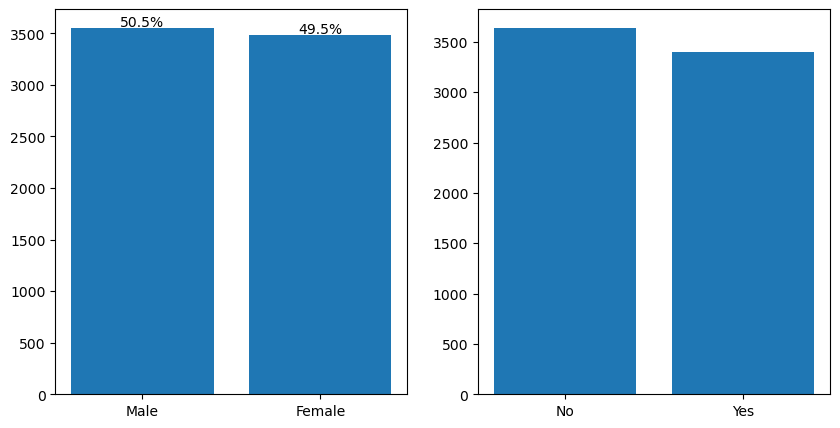

In [92]:
#Distribution of the gender, Married
fig, ax = plt.subplots(1, 2, figsize=[10,5])
ax[0].bar(x=df['Gender'].value_counts().index, height=df['Gender'].value_counts().values)
ax[1].bar(x=df['Married'].value_counts().index, height=df['Married'].value_counts().values)

for index, values in enumerate(df['Gender'].value_counts()):
    ax[0].annotate(str(round((values/len(df))*100, 1))+'%', xy=(index, values+50), ha='center', va='center')
plt.show()